1.a. 

    State          Energy            Multiplicity              Weight
    
    Off            P*ε_NS            (N_NS)^P / P!           ((N_NS)^P/P!)*e^((-P*ε_NS)/(k_B*T))
    
    On          P*ε_NS + ε_S      (N_NS)^(P-1) / (P-1)!     ((N_NS)^(P-1)/(P-1)!)*e^((-(P-1)*ε_NS + ε_S)/(k_B*T))
    
1.b.

    p_bound = Weight_on / (Weight_on + Weight_off)
            = ((N_NS)^(P-1)/(P-1)!)*e^((-(P-1)*ε_NS + ε_S)/(k_B*T)) / (((N_NS)^(P-1)/(P-1)!)*e^((-(P-1)*ε_NS +  
              ε_S)/(k_B*T)) + ((N_NS)^P/P!)*e^((-P*ε_NS)/(k_B*T)))

1.c.

    p_bound = ((N_NS)^(P-1)/(P-1)!)*e^((-(P-1)*ε_NS + ε_S)/(k_B*T)) / (((N_NS)^(P-1)/(P-1)!)*e^((-(P-1)*ε_NS +  
              ε_S)/(k_B*T)) + ((N_NS)^P/P!)*e^((-P*ε_NS)/(k_B*T)))
            * (P!/(N_NS^P))*e^((P*ε_NS)/(k_B*T)) / (P!/(N_NS^P))*e^((P*ε_NS)/(k_B*T))
            = ((P/N_NS)*e^((ε_NS - ε_S)/(k_B*T))) / ((P/N_NS)*e^((ε_NS - ε_S)/(k_B*T)) + 1)
            = ((P/N_NS)*e^((-∆ε)/(k_B*T))) / ((P/N_NS)*e^((-∆ε)/(k_B*T)) + 1)
    

In [45]:
# 2.a.b.

# Imports
import linecache

def compute_energy_matrix(filename, start, end):
    '''
    Function to convert a data file with energy matrix data to an energy matrix of the form:
    [[A_val_1, C_val_1, G_val_1, T_val_1], [A_val_2, C_val_2, G_val_2, T_val_2], etc.]
    
    Parameters:
        file_name : string
            name of the file that contains the data for the energy matrix
        start, end : integers
            start line and end line of the data in the file
    Returns:
        energy_matrix : 4 by (end - start) float matrix 
            energy matrix computed of the above form
    '''
    # Initialize energy_matrix
    energy_matrix = [[0 for x in range(4)] for y in range(end - start)]

    # For loop to sort through file of type given in data set and convert to energy_matrix format
    for i in range(start, end):
        # Set up variables
        first = True
        second = True
        third = True
        fourth = True
        gap1 = 0
        gap2 = 0
        gap3 = 0
        A_val = 0
        C_val = 0
        G_val = 0
        T_val = 0
        
        # Open line
        line = linecache.getline(filename, i)
        
        # For loop to convert each line to 4 entries in energy_matrix
        for j in range(len(line)):
            if (line[j:j+1] == ' ' and first):
                gap1 = j+1
                first = False
                A_val = float(line[0:j])
            elif (line[j:j+1] == ' ' and second):
                gap2 = j+1
                second = False
                C_val = float(line[gap1:j])
            elif (line[j:j+1] == ' ' and third):
                gap3 = j+1
                third = False
                G_val = float(line[gap2:j])
            elif (line[j:j+2] == '\n' and fourth):
                fourth = False
                T_val = float(line[gap3:j])
        
        # Assign energy_matrix values for current line
        energy_matrix[i-8][0] = A_val
        energy_matrix[i-8][1] = C_val
        energy_matrix[i-8][2] = G_val
        energy_matrix[i-8][3] = T_val
        
    return energy_matrix

def compute_binding_energy(promoter, energy_matrix):
    '''
    Function to compute the binding energy given a promoter and a energy matrix
    
    Paramters:
        promoter : string
            string representing the promoter for which the binding energy will be calculated
        energy_matrix : float matrix
            energy matrix to be used in calculating the binding energy
    
    Returns:
        binding_energy : float
            the binding energy calculated for the promoter
    '''
    
    # Initialize binding_energy
    binding_energy = 0
    
    # For loop to calculate the binding_energy for the promoter using the energy_matrix
    for i in range(len(promoter)):
        if (promoter[i:i+1] == 'A'):
            binding_energy = binding_energy + energy_matrix[i][0]
        elif (promoter[i:i+1] == 'C'):
            binding_energy = binding_energy + energy_matrix[i][1]
        elif (promoter[i:i+1] == 'G'):
            binding_energy = binding_energy + energy_matrix[i][2]
        elif (promoter[i:i+1] == 'T'):
            binding_energy = binding_energy + energy_matrix[i][3]
    
    return binding_energy

# Do the calculations for our problems
em = compute_energy_matrix('hw6_dataset.txt', 8, 49)
p1 = 'TCGAGTTTACACTTTATGCTTCCGGCTCGTATAATGTGTGG'
p2 = 'TCGAGTTTACACTTTATGCTTCCGGCTCGGATAATGTGTGG'
p3 = 'CAGGCTCTACGCTTTATTCTTGCGGCTCGTATGGTGTGTGG'
p4 = 'GAGGCTGGACACTTTAATCTTCCCTATCGTATGTTGTGTGC'
p5 = 'CGAGCATGCCACCTTAAGCCTCTGGCTCGTATGACGTGTGG'
be1 = compute_binding_energy(p1, em)
be2 = compute_binding_energy(p2, em)
be3 = compute_binding_energy(p3, em)
be4 = compute_binding_energy(p4, em)
be5 = compute_binding_energy(p5, em)

# Print stuff
print('2.a.1. binding energy = ' + str(be1) + ' kBT')
print('2.a.2. binding energy = ' + str(be2) + ' kBT')
print('2.b.1. binding energy = ' + str(be3) + ' kBT')
print('2.b.2. binding energy = ' + str(be4) + ' kBT')
print('2.b.3. binding energy = ' + str(be5) + ' kBT')


2.a.1. binding energy = -6.992057747845057 kBT
2.a.2. binding energy = -5.584672027506074 kBT
2.b.1. binding energy = -3.9363706563196317 kBT
2.b.2. binding energy = -6.294688950104942 kBT
2.b.3. binding energy = -3.2291480237687833 kBT


    
    2.a.1. binding energy = -6.992057747845057 kBT
    2.a.2. binding energy = -5.584672027506074 kBT
    2.b.1. binding energy = -3.9363706563196317 kBT
    2.b.2. binding energy = -6.294688950104942 kBT
    2.b.3. binding energy = -3.2291480237687833 kBT
    

3.a.

    State                 Renormalized Weight
    1                             1
    2                  (P/(N_NS))*e^((ε_NS - ε_S)/k_B*T)
    3                  (R/(N_NS))*e^((ε_NS - ε_S)/k_B*T)
    
3.b.

    p_bound = Weight_2 / (Weight_1 + Weight_2 + Weight_3)
            = (P/(N_NS))*e^((ε_NS - ε_S)/k_B*T) / (1 + (P/(N_NS))*e^((ε_NS - ε_S)/k_B*T) + 
              (R/(N_NS))*e^((ε_NS - ε_S)/k_B*T))
            = (P/(N_NS))*e^(-∆ε_p/(k_B*T)) / (1 + (P/(N_NS))*e^(-∆ε_p/(k_B*T)) + (R/(N_NS))*e^(-∆ε_r/(k_B*T)))
              
3.c.
    
    p_1 = Weight_1 / (Weight_1 + Weight_2 + Weight_3)
        = 1 / (1 + (P/(N_NS))*e^(-∆ε_p/(k_B*T)) + (R/(N_NS))*e^(-∆ε_r/(k_B*T)))
    p_2 = p_bound = (P/(N_NS))*e^(-∆ε_p/(k_B*T)) / (1 + (P/(N_NS))*e^(-∆ε_p/(k_B*T)) + (R/(N_NS))*e^(-∆ε_r/(k_B*T)))
    p_3 = (R/(N_NS))*e^(-∆ε_r/(k_B*T)) / (1 + (P/(N_NS))*e^(-∆ε_p/(k_B*T)) + (R/(N_NS))*e^(-∆ε_r/(k_B*T)))
    

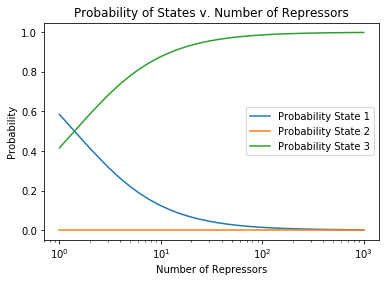

In [57]:
# 3.c.

# Imports
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

# Given parameters
P = 1000
E_p = 5
E_r = -15
N_NS = 4.6 * 10**6
e = 2.71828

# Initialize matrices to store data points
p1 = numpy.zeros(1000)
p2 = numpy.zeros(1000)
p3 = numpy.zeros(1000)

# Calculating the probabilities
for R in range(1, 1001):
    p1[R-1] = 1 / (1 + (P / (N_NS)) * e**(-1 * E_p) + (R / (N_NS)) * e**(-1 * E_r))
    p2[R-1] = ((P / (N_NS)) * e**(-1 * E_p)) / (1 + (P / (N_NS)) * e**(-1 * E_p) + (R / (N_NS)) * e**(-1 * E_r))
    p3[R-1] = ((R / (N_NS)) * e**(-1 * E_r)) / (1 + (P / (N_NS)) * e**(-1 * E_p) + (R / (N_NS)) * e**(-1 * E_r))

# Plot stuff
plt.plot(range(1,1001), p1, label = 'Probability State 1')
plt.plot(range(1,1001), p2, label = 'Probability State 2')
plt.plot(range(1,1001), p3, label = 'Probability State 3')
plt.title('Probability of States v. Number of Repressors')
plt.xlabel('Number of Repressors')
plt.ylabel('Probability')
plt.xscale('log')
plt.legend()


3.d.

    dm/dt = r * p_bound - γm
    Steady state so dm/dt = 0
    0 = r * p_bound - γm
    γm = r * p_bound
    m = (r * p_bound) / γ
    
    fold-change = m(R>0) / m(R=0)
                = (r/γ * p_bound(R>0)) / (r/γ * p_bound(R=0))
                = ((P/(N_NS))*e^(-∆ε_p/(k_B*T)) / (1 + (P/(N_NS))*e^(-∆ε_p/(k_B*T)) +
                (R/(N_NS))*e^(-∆ε_r/(k_B*T)))) / (((P/N_NS)*e^((-∆ε)/(k_B*T))) / ((P/N_NS)*e^((-∆ε)/(k_B*T)) + 1))
                = ((P/N_NS)*e^((-∆ε_p)/(k_B*T)) + 1) / (1 + (P/(N_NS))*e^(-∆ε_p/(k_B*T)) + 
                  (R/(N_NS))*e^(-∆ε_r/(k_B*T))

3.e.

    Weight_2 = (P/N_NS)*e^((-∆ε_p)/(k_B*T)) ≈ 0 (when compared to other weights)
    
    fold-change = 1 / (1 + (R/(N_NS))*e^(-∆ε_r/(k_B*T)))
    

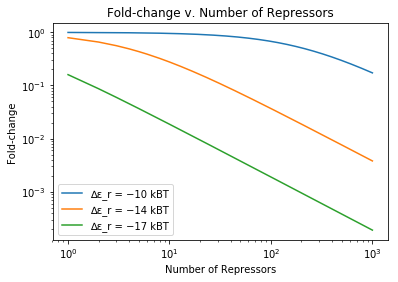

In [59]:
# 3.f.

N_NS = 4.6 * 10**6
E_r1 = -10
E_r2 = -14
E_r3 = -17
e = 2.71828

fc1 = numpy.zeros(1000)
fc2 = numpy.zeros(1000)
fc3 = numpy.zeros(1000)

for R in range(1, 1001):
    fc1[R-1] = 1 / (1 + (R/(N_NS))*e**(-1 * E_r1))
    fc2[R-1] = 1 / (1 + (R/(N_NS))*e**(-1 * E_r2))
    fc3[R-1] = 1 / (1 + (R/(N_NS))*e**(-1 * E_r3))
    
plt.plot(range(1,1001), fc1, label = '∆ε_r = −10 kBT')
plt.plot(range(1,1001), fc2, label = '∆ε_r = −14 kBT')
plt.plot(range(1,1001), fc3, label = '∆ε_r = −17 kBT')
plt.title('Fold-change v. Number of Repressors')
plt.xlabel('Number of Repressors')
plt.ylabel('Fold-change')
plt.xscale('log')
plt.yscale('log')
plt.legend()